In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [27]:
# Other imports
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 12345

from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from sklearn.svm import SVC
from qiskit import opflow

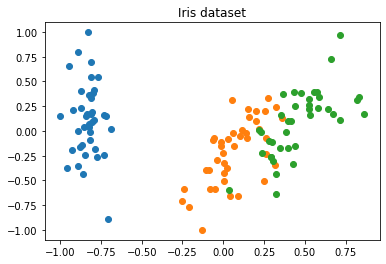

In [34]:
# Import dataset
from qiskit_machine_learning.datasets import iris

num_features = 4
train_features, train_labels, test_features, test_labels = iris(
    training_size=120,
    test_size=30,
    n=num_features,
    plot_data=True,
    one_hot=False,
)

In [31]:
# Defining feature maps from data and kernels to be used - Fidelity kernel has been used
iris_feature_map = ZFeatureMap(n, reps=3, insert_barriers=True)

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

iris_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=iris_feature_map)

In [32]:
# QSVM classification
qsvc = QSVC(quantum_kernel=iris_kernel)

qsvc.fit(train_features, train_labels)

qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.9


In [33]:
# Classical SVM classification
svc = SVC(kernel=iris_kernel.evaluate)

svc.fit(train_features, train_labels)

svc_score = svc.score(test_features, test_labels)

print(f"SVC classification test score: {svc_score}")

SVC classification test score: 0.9
